# Creation of seven networks

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import math
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
parent_dir = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()), os.pardir))

## Sensors and pixel signals

In [3]:
synth_xytv = pd.read_csv(os.path.join(os.path.join(parent_dir,'session','synth_all_'+str(6400),'tab'),'dataset.csv'))

In [4]:
synth_xytv

x         y     truth  sensor_hq  sensor_mq  sensor_lq  \
0     0.494602  0.122994  1.486247   1.493592   1.555382   1.075964   
1     0.228083  0.683757  0.855385   0.843857   0.783815   0.853484   
2     0.255474  0.080199  0.234323   0.235404   0.254706   0.344591   
3     0.396330  0.714549  1.583621   1.615324   1.821124   1.689177   
4     0.377315  0.423686  0.727369   0.714078   0.806790   0.808479   
...        ...       ...       ...        ...        ...        ...   
6395  0.178851  0.329088  0.959616   0.940673   1.089635   1.476217   
6396  0.507812  0.582770  1.244534   1.279711   1.181461   1.723643   
6397  0.114565  0.449625  0.662260   0.680413   0.626966   0.352220   
6398  0.972229  0.548972  1.061588   1.065952   1.089662   0.970902   
6399  0.783322  0.284954  0.995735   1.014267   0.985390   0.758148   

      agg_truth  pixel_hq  pixel_mq  pixel_lq  
0      1.546848  1.642677  1.523947  1.366071  
1      0.867768  0.905118  1.077857  1.114976  
2      0.198416  0.230724  0.257528  0.281667  
3      1.495739  1.579636  1.547984  1.410676  
4      0.789590  0.833727  0.859041  0.613176  
...         ...       ...       ...       ...  
6395   0.906653  0.964412  1.067146  0.715117  
6396   1.227688  1.324958  1.211743  1.137135  
6397   0.744038  0.772395  0.700473  0.806782  
6398   0.994949  1.062212  0.973320  1.297405  
6399   1.079784  1.093927  1.239223  0.727199  

[6400 rows x 10 columns]

## comparison of the different signals against ground truth

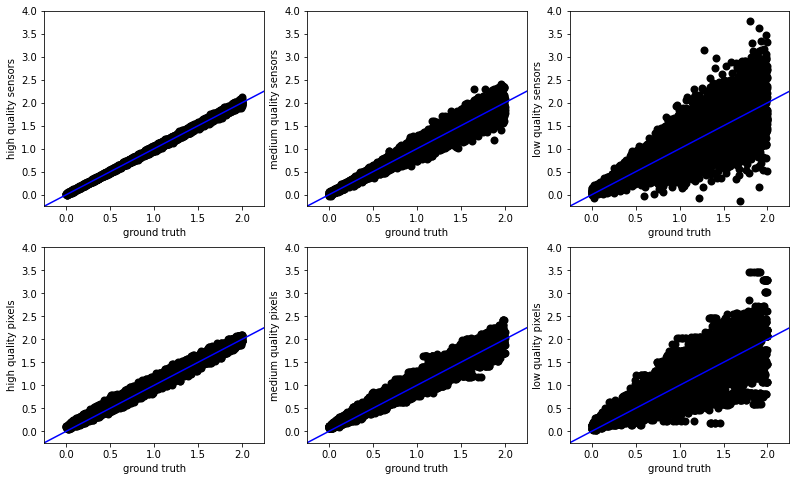

In [5]:

fig = plt.figure(constrained_layout=True,figsize=(14, 12))
gs = GridSpec(4, 4, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax1.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"sensor_hq"], linewidth=2.0,c="black")
ax1.axline((0, 0), slope=1., color='blue')
ax1.set_xlim(-0.25, 2.25)
ax1.set_ylim(-0.25, 4)
ax1.set(xlabel='ground truth', ylabel='high quality sensors')

ax2 = fig.add_subplot(gs[0,1])
ax2.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"sensor_mq"], linewidth=2.0,c="black")
ax2.axline((0, 0), slope=1., color='blue')
ax2.set_xlim(-0.25, 2.25)
ax2.set_ylim(-0.25, 4)
ax2.set(xlabel='ground truth', ylabel='medium quality sensors')

ax3 = fig.add_subplot(gs[0,2])
ax3.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"sensor_lq"], linewidth=2.0,c="black")
ax3.axline((0, 0), slope=1., color='blue')
ax3.set_xlim(-0.25, 2.25)
ax3.set_ylim(-0.25, 4)
ax3.set(xlabel='ground truth', ylabel='low quality sensors')

ax4 = fig.add_subplot(gs[1,0])
ax4.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"pixel_hq"], linewidth=2.0,c="black")
ax4.axline((0, 0), slope=1., color='blue')
ax4.set_xlim(-0.25, 2.25)
ax4.set_ylim(-0.25, 4)
ax4.set(xlabel='ground truth', ylabel='high quality pixels')

ax5 = fig.add_subplot(gs[1,1])
ax5.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"pixel_mq"], linewidth=2.0,c="black")
ax5.axline((0, 0), slope=1., color='blue')
ax5.set_xlim(-0.25, 2.25)
ax5.set_ylim(-0.25, 4)
ax5.set(xlabel='ground truth', ylabel='medium quality pixels')

ax6 = fig.add_subplot(gs[1,2])
ax6.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"pixel_lq"], linewidth=2.0,c="black")
ax6.axline((0, 0), slope=1., color='blue')
ax6.set_xlim(-0.25, 2.25)
ax6.set_ylim(-0.25, 4)
ax6.set(xlabel='ground truth', ylabel='low quality pixels')

fig_filename = os.path.join(parent_dir,'fig','synth_qqplot.png')
plt.savefig(fig_filename, dpi = 300)

## Producing dataset for the experiments

In [6]:
def produce_sample(all_xyv,nb_sampling,index,name,parent_dir):
    
    sampling_xyv = all_xyv.iloc[index]
    
    newpath = os.path.join(parent_dir,'session','synth_'+str(nb_sampling)+'_'+name,'tab')
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    f = os.path.join(newpath,'dataset.csv')
    sampling_xyv.to_csv(f,index=False)

In [7]:
def produce_set(all_xyv,nb_sampling,parent_dir,seed=50):
    np.random.seed(seed)
    index1 = random.sample([x for x in range(all_xyv.shape[0])], nb_sampling)
    index2 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1], nb_sampling)
    index3 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2], nb_sampling)
    index4 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3], nb_sampling)
    index5 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3 and x != index4], nb_sampling)
    index6 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3 and x != index4 and x != index5], nb_sampling)
    index7 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3 and x != index4 and x != index5 and x != index6], nb_sampling)
    
    produce_sample(all_xyv,nb_sampling,index1,'Y_train',parent_dir)
    produce_sample(all_xyv,nb_sampling,index2,'X_train',parent_dir)
    produce_sample(all_xyv,nb_sampling,index3,'Y_valid',parent_dir)
    produce_sample(all_xyv,nb_sampling,index4,'X_valid',parent_dir)
    produce_sample(all_xyv,nb_sampling,index5,'Y_eval',parent_dir)
    produce_sample(all_xyv,nb_sampling,index6,'X_eval',parent_dir)
    produce_sample(all_xyv,nb_sampling,index7,'colocation',parent_dir)

In [8]:
produce_set(synth_xytv,1000,parent_dir)